In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

from scipy import stats

In [2]:
def get_t_score_from_p_value(p_val_ref,df):
    t_score = 1
    p_val = 2*(1 - stats.t.cdf(t_score,df=df))
    err = 0.0000001
    factor = 10

    while abs(p_val - p_val_ref) > err:
        t_score = t_score + (p_val - p_val_ref)*factor
        p_val = 2*(1 - stats.t.cdf(t_score,df=df))
        
    return t_score

# MQ2008

In [3]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [4]:
dataset_path = "../../MQ2008/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

In [5]:
n_samples_datasets

[9126, 3042, 3042]

### NDCG measures for the top models of our personal ListNet implementation

In [6]:
my_listnet_path = "../../MQ2008/results_summary/Results_LETOR_global_vali.csv"
my_listnet_df = pd.read_csv(my_listnet_path)

my_listnet_df = my_listnet_df.sort_values(['NDCG_Mean'],ascending=False)
my_listnet_top_model_id = my_listnet_df.index[0]

In [7]:
#TOP 5 MODELS OF OUR PERSONAL LISTNET IMPLEMENTATION
my_listnet_df.head(5)

,epochs,learning_rate,momemtum,activation,inner_act,number_layers,number_neurons,dropout,P@1,P@2,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
28,600,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.50000,0.44960,...,0.48128,0.49710,0.51280,0.52386,0.52836,0.48814,0.23820,0.24182,0.440948,0.010778
24,500,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.48934,0.44684,...,0.47484,0.49366,0.50820,0.52056,0.52520,0.48508,0.23612,0.24006,0.436548,0.010628
31,600,0.0025,0.5,linear,relu,2.0,100.0,0.80,0.48256,0.44128,...,0.47408,0.49100,0.50692,0.51710,0.52134,0.48150,0.23310,0.23682,0.433206,0.010670
27,500,0.0025,0.5,linear,relu,2.0,100.0,0.80,0.48086,0.43684,...,0.47028,0.48764,0.50166,0.51322,0.51774,0.47784,0.22948,0.23338,0.430202,0.010633
23,400,0.0025,0.5,linear,relu,2.0,100.0,0.80,0.47786,0.43704,...,0.46684,0.48602,0.50032,0.51190,0.51654,0.47744,0.23146,0.23494,0.429128,0.010375


In [8]:
my_listnet_df.iloc[0]["P_Mean"]

0.356508

In [37]:
my_listnet_path = "../../MQ2008/results_summary/Results_LETOR_global_test.csv"
my_listnet_df = pd.read_csv(my_listnet_path)
my_listnet_df.iloc[my_listnet_top_model_id]

epochs                   600
learning_rate         0.0025
momemtum                 0.5
activation            linear
inner_act               relu
number_layers              1
number_neurons           100
dropout                 0.65
P@1                  0.43238
P@2                  0.40304
P@3                  0.38436
P@4                  0.36608
P@5                  0.34592
P@6                  0.32374
P@7                  0.30268
P@8                  0.28266
P@9                    0.265
P@10                 0.24808
P_Mean              0.335394
P_Var             0.00339983
NDCG@1                0.3635
NDCG@2               0.39124
NDCG@3                0.4176
NDCG@4               0.44476
NDCG@5               0.46702
NDCG@6               0.47998
NDCG@7               0.48792
NDCG@8               0.45314
NDCG@9               0.22194
NDCG@10              0.22558
NDCG_Mean           0.395268
NDCG_Var          0.00870683
Name: 28, dtype: object

### NDCG measures for the top models of RankLib implementation

In [9]:
ranklib_path = "../../MQ2008/results_summary/Results_RankLib_global_vali.csv"
ranklib_df = pd.read_csv(ranklib_path)

ranklib_df = ranklib_df.sort_values(['NDCG_Mean'],ascending=False)
ranklib_top_model_id = ranklib_df.index[0]

In [10]:
#TOP 5 MODELS OF THE RANKLIB IMPLEMENTATION
ranklib_df.head(5)

,epochs,learning_rate,Opti_method,P@1,P@2,P@3,P@4,P@5,P@6,P@7,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
15,1000,0.00001,NDCG@5,0.41752,0.39138,0.36706,0.35022,0.33266,0.31378,0.29300,...,0.40856,0.43220,0.45352,0.47004,0.47670,0.44342,0.21112,0.21592,0.385060,0.008635
21,1500,0.00100,NDCG@10,0.41496,0.38798,0.36564,0.34608,0.33120,0.31198,0.29214,...,0.40744,0.42988,0.45152,0.46752,0.47510,0.44168,0.21086,0.21542,0.383548,0.008511
28,1500,0.00001,P@10,0.41326,0.38902,0.36366,0.34950,0.33342,0.31340,0.29196,...,0.40490,0.43024,0.45228,0.46796,0.47476,0.44172,0.21212,0.21614,0.383384,0.008456
37,2000,0.00001,P@5,0.41494,0.38730,0.36492,0.35128,0.33410,0.31436,0.29210,...,0.40584,0.43172,0.45356,0.46782,0.47428,0.44070,0.20956,0.21410,0.383244,0.008618
29,1500,0.00001,ERR@10,0.41070,0.38904,0.36506,0.35010,0.33146,0.31292,0.29232,...,0.40700,0.43150,0.45222,0.46746,0.47524,0.44196,0.21008,0.21522,0.383020,0.008613


In [11]:
ranklib_df.iloc[0]["P_Mean"]

0.324048

In [38]:
ranklib_path = "../../MQ2008/results_summary/Results_RankLib_global_test.csv"
ranklib_df = pd.read_csv(ranklib_path)
ranklib_df.iloc[ranklib_top_model_id]

epochs                 1500
learning_rate         0.001
Opti_method            P@10
P@1                  0.3941
P@2                   0.382
P@3                  0.3601
P@4                 0.34408
P@5                 0.32528
P@6                 0.30826
P@7                 0.28844
P@8                 0.27312
P@9                  0.2555
P@10                0.24146
P_Mean             0.317234
P_Var            0.00251344
NDCG@1              0.33458
NDCG@2              0.37208
NDCG@3               0.3968
NDCG@4              0.42202
NDCG@5              0.44338
NDCG@6               0.4588
NDCG@7               0.4652
NDCG@8              0.43516
NDCG@9              0.20638
NDCG@10             0.21136
NDCG_Mean          0.374576
NDCG_Var         0.00829909
Name: 23, dtype: object

### Comparison NDCG measures between top model of personal ListNet and RankLib

In [12]:
my_listnet_mean = [[] for x in range(len(datasets))]
my_listnet_var = [[] for x in range(len(datasets))]

ranklib_mean = [[] for x in range(len(datasets))]
ranklib_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    my_listnet_list_NDCG = [[] for x in range(len(measures_names))]
    ranklib_list_NDCG = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2008/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ranklib_path = "../../MQ2008/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        ranklib_df = pd.read_csv(ranklib_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_list_NDCG[idx_metric].append(my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]])
            ranklib_list_NDCG[idx_metric].append(ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]])
            
    my_listnet_mean[idx_dataset] = np.array(my_listnet_list_NDCG).mean(axis=1)
    my_listnet_var[idx_dataset] = np.array(my_listnet_list_NDCG).var(axis=1)
    
    ranklib_mean[idx_dataset] = np.array(ranklib_list_NDCG).mean(axis=1)
    ranklib_var[idx_dataset] = np.array(ranklib_list_NDCG).var(axis=1)

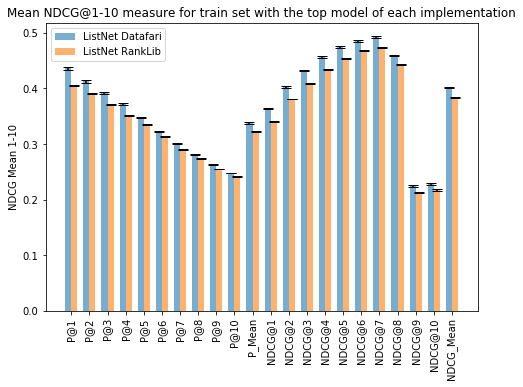

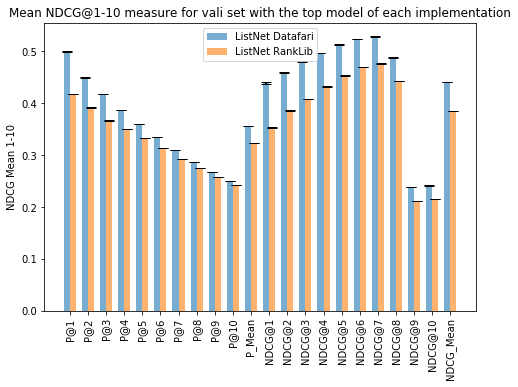

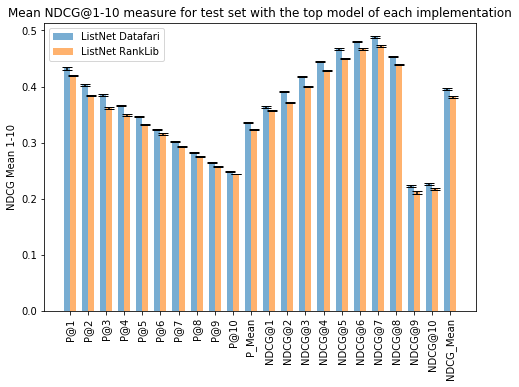

In [13]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, my_listnet_mean[idx_dataset],width, yerr = my_listnet_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet Datafari")
    ax.bar(indices+width/2, ranklib_mean[idx_dataset],width, yerr = ranklib_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet RankLib")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [14]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [15]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2008/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ranklib_path = "../../MQ2008/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        ranklib_df = pd.read_csv(ranklib_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_NDCG = my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]]
            ranklib_NDCG = ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]]
            diff[idx_metric].append(my_listnet_NDCG - ranklib_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


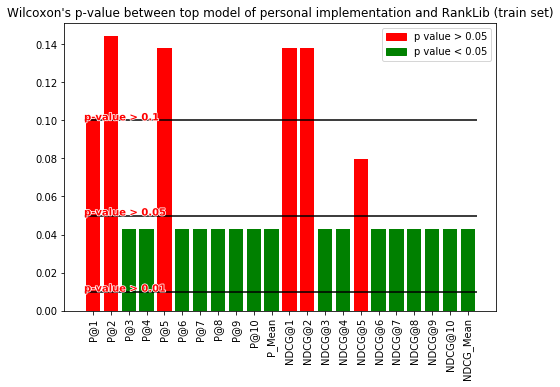

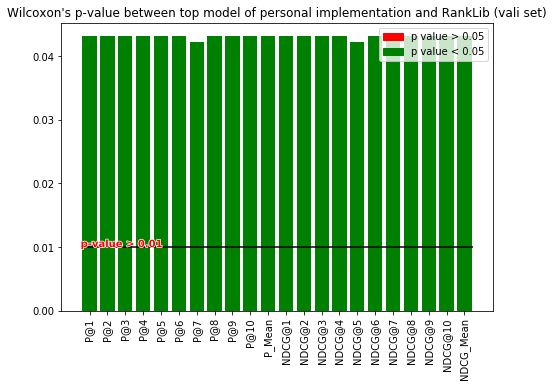

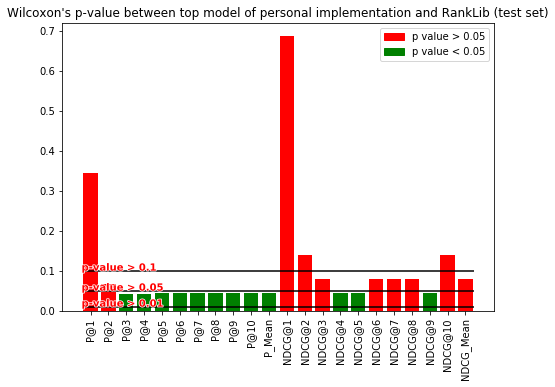

In [16]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of personal implementation and RankLib ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [17]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,1.5,1,0,0,2,0,0,0,0,0,0,2,2,0,0,1,0,0,0,0,0,0
vali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
test,4,0,0,0,0,0,0,0,0,0,0,6,2,1,0,0,1,1,1,0,2,1


In [18]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.10247,0.144127,0.0431144,0.0431144,0.138011,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.138011,0.138011,0.0431144,0.0431144,0.0796158,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144
vali,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0421682,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0421682,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144
test,0.345231,0.0678892,0.0421682,0.0421682,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.68583,0.138011,0.0796158,0.0431144,0.0431144,0.0796158,0.0796158,0.0796158,0.0431144,0.138011,0.0796158


# MQ2007

In [19]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [20]:
dataset_path = "../../MQ2007/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of our personal implementation

In [21]:
my_listnet_path = "../../MQ2007/results_summary/Results_LETOR_global_vali.csv"
my_listnet_df = pd.read_csv(my_listnet_path)

my_listnet_df = my_listnet_df.sort_values(['NDCG_Mean'],ascending=False)
my_listnet_top_model_id = my_listnet_df.index[0]

In [22]:
my_listnet_df.head(5)

,epochs,learning_rate,momemtum,activation,inner_act,number_layers,number_neurons,dropout,P@1,P@2,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
28,600,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.48170,0.46416,...,0.42696,0.43254,0.43758,0.44402,0.44842,0.45414,0.45856,0.46358,0.440786,0.000214
24,500,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.47636,0.46208,...,0.42340,0.42814,0.43314,0.43840,0.44384,0.44916,0.45376,0.45900,0.436204,0.000208
30,600,0.0025,0.5,linear,relu,2.0,100.0,0.65,0.47734,0.46052,...,0.42262,0.42822,0.43324,0.43834,0.44328,0.44856,0.45334,0.45890,0.435820,0.000211
26,500,0.0025,0.5,linear,relu,2.0,100.0,0.65,0.47320,0.45716,...,0.42044,0.42528,0.43004,0.43478,0.43972,0.44456,0.44960,0.45504,0.432546,0.000198
20,400,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.47952,0.45854,...,0.41716,0.42350,0.42870,0.43358,0.43860,0.44442,0.44964,0.45524,0.432252,0.000188


In [23]:
my_listnet_df.iloc[0]["P_Mean"]

0.430972

### NDCG measures for the top models of RankLib implementation

In [24]:
ranklib_path = "../../MQ2007/results_summary/Results_RankLib_global_vali.csv"
ranklib_df = pd.read_csv(ranklib_path)

ranklib_df = ranklib_df.sort_values(['NDCG_Mean'],ascending=False)
ranklib_top_model_id = ranklib_df.index[0]

In [25]:
ranklib_df.head(5)

,epochs,learning_rate,Opti method,P@1,P@2,P@3,P@4,P@5,P@6,P@7,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
23,1500,0.001,P@10,0.45134,0.43124,0.41496,0.40120,0.39234,0.38526,0.37660,...,0.39238,0.39460,0.39812,0.40378,0.40772,0.41318,0.41816,0.42424,0.402896,0.000145
31,2000,0.001,NDCG@10,0.45312,0.43146,0.41434,0.40190,0.39294,0.38588,0.37826,...,0.39078,0.39406,0.39794,0.40318,0.40762,0.41292,0.41848,0.42364,0.402724,0.000141
1,500,0.001,NDCG@10,0.44684,0.43352,0.41478,0.40294,0.39244,0.38544,0.37680,...,0.39194,0.39518,0.39798,0.40342,0.40720,0.41236,0.41786,0.42304,0.402362,0.000146
3,500,0.001,P@10,0.44858,0.42986,0.41562,0.40236,0.39314,0.38722,0.37918,...,0.39148,0.39386,0.39748,0.40390,0.40822,0.41304,0.41878,0.42406,0.402356,0.000162
22,1500,0.001,P@5,0.44862,0.43106,0.41634,0.40274,0.39256,0.38542,0.37778,...,0.39202,0.39468,0.39746,0.40340,0.40754,0.41294,0.41792,0.42348,0.402334,0.000151


In [26]:
ranklib_df.iloc[0]["P_Mean"]

0.394984

### Comparison NDCG measures between top model of personal ListNet and RankLib

In [27]:
my_listnet_mean = [[] for x in range(len(datasets))]
my_listnet_var = [[] for x in range(len(datasets))]

ranklib_mean = [[] for x in range(len(datasets))]
ranklib_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    my_listnet_list_NDCG = [[] for x in range(len(measures_names))]
    ranklib_list_NDCG = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2007/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ranklib_path = "../../MQ2007/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        ranklib_df = pd.read_csv(ranklib_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_list_NDCG[idx_metric].append(my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]])
            ranklib_list_NDCG[idx_metric].append(ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]])
            
    my_listnet_mean[idx_dataset] = np.array(my_listnet_list_NDCG).mean(axis=1)
    my_listnet_var[idx_dataset] = np.array(my_listnet_list_NDCG).var(axis=1)
    
    ranklib_mean[idx_dataset] = np.array(ranklib_list_NDCG).mean(axis=1)
    ranklib_var[idx_dataset] = np.array(ranklib_list_NDCG).var(axis=1)

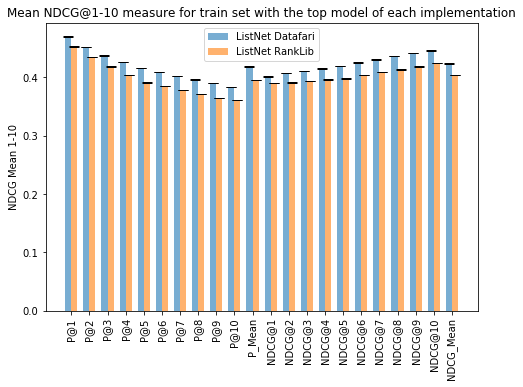

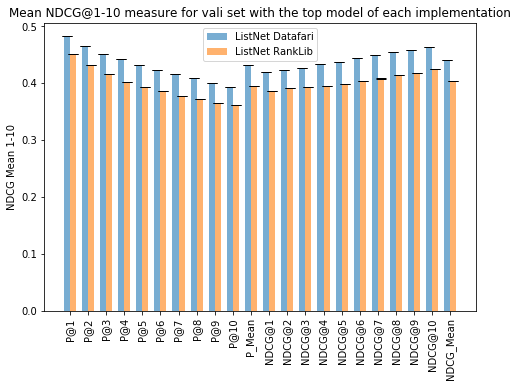

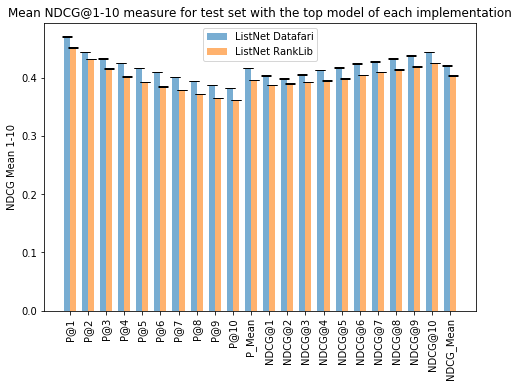

In [28]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, my_listnet_mean[idx_dataset],width, yerr = my_listnet_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet Datafari")
    ax.bar(indices+width/2, ranklib_mean[idx_dataset],width, yerr = ranklib_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet RankLib")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [29]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [30]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2007/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ranklib_path = "../../MQ2007/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        ranklib_df = pd.read_csv(ranklib_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_NDCG = my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]]
            ranklib_NDCG = ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]]
            diff[idx_metric].append(my_listnet_NDCG - ranklib_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

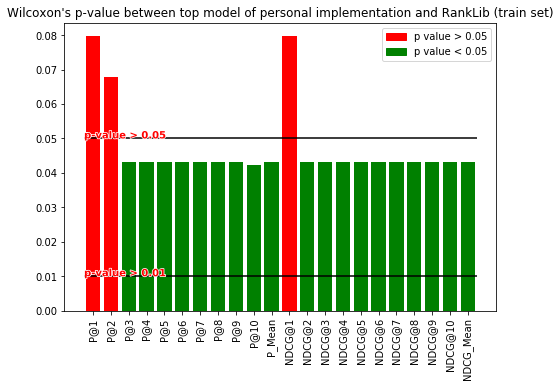

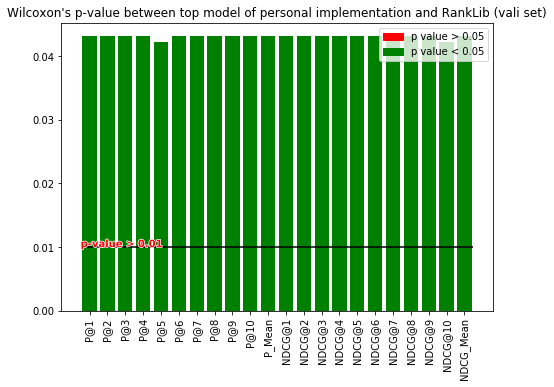

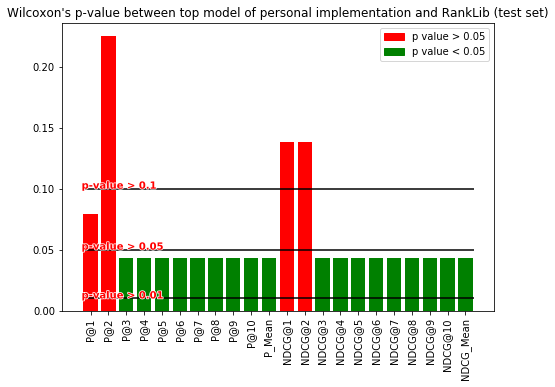

In [31]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of personal implementation and RankLib ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [32]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
vali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
test,1,3,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0


In [33]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.0796158,0.0678892,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0421682,0.0431144,0.0796158,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144
vali,0.0431144,0.0431144,0.0431144,0.0431144,0.0421682,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0421682,0.0431144
test,0.0796158,0.224916,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.138011,0.138011,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144
